<a href="https://colab.research.google.com/github/phajavi/404-error/blob/main/mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils  import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split



In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)



11490434/11490434 [==============================] - 0s 0us/step


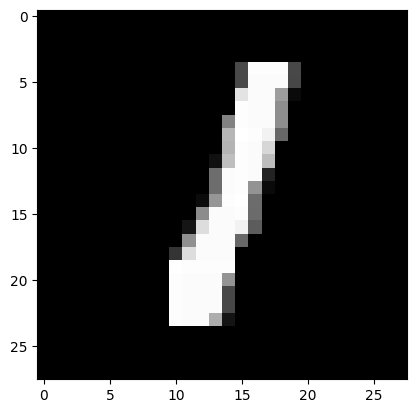

In [3]:
plt.imshow(x_train[2], cmap = "gray")
plt.show()


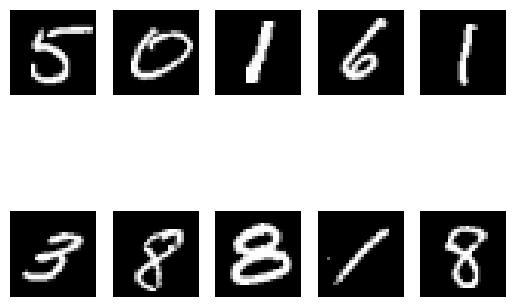

In [4]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
plt.show()

data Preproccessing
1: normalization
2: reshape the data
3:
one hot encoding


In [5]:
# normalization pixel values to between 0 and 1
x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32')/255



In [6]:
# reshape the data to be 4D (batch_size, height, width, channels)
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)

In [7]:
# convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# define model architecture(CNN)
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape= x_train.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10,activation= 'softmax'))

In [9]:
# compile model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data=(x_test,y_test))

Epoch 1/5
375/375 [==============================] - 27s 71ms/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.0471 - val_accuracy: 0.9848
Epoch 2/5
375/375 [==============================] - 20s 52ms/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.0431 - val_accuracy: 0.9865
Epoch 3/5
375/375 [==============================] - 20s 53ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0427 - val_accuracy: 0.9866
Epoch 4/5
375/375 [==============================] - 21s 55ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0448 - val_accuracy: 0.9858
Epoch 5/5
375/375 [==============================] - 20s 54ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0454 - val_accuracy: 0.9864


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('test accuracy: ', test_acc)

test accuracy:  0.9831666946411133


In [12]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (48000, 28, 28, 1) (48000, 10)
Testing set shape: (12000, 28, 28, 1) (12000, 10)
